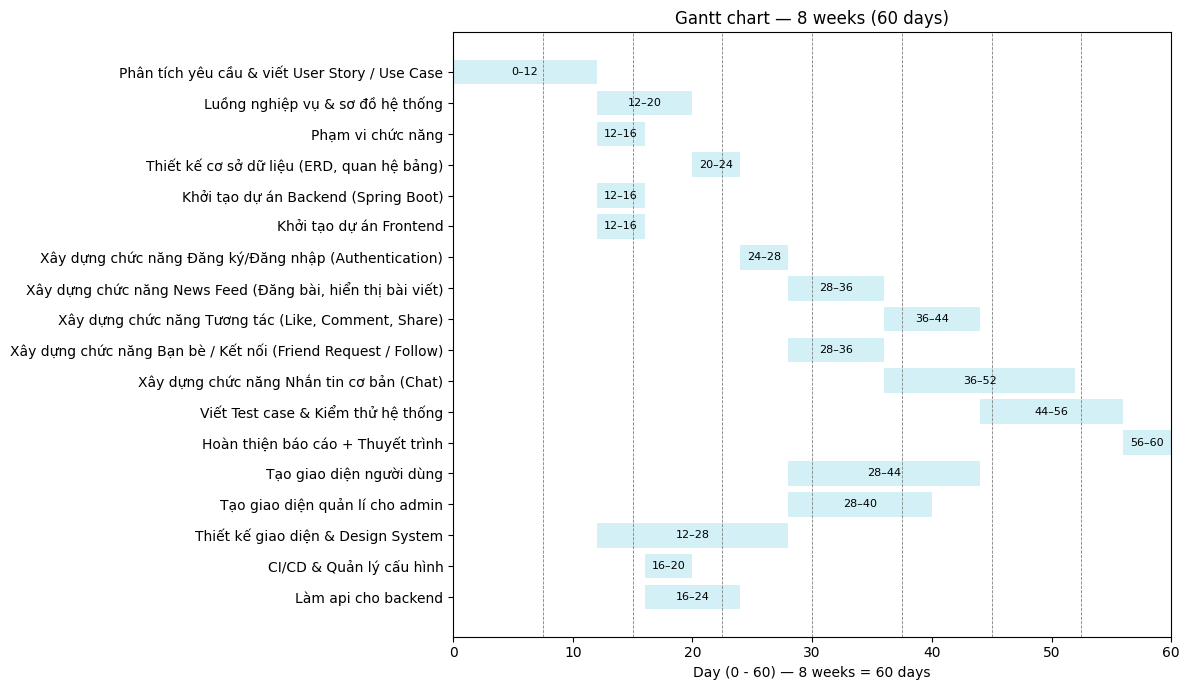

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Danh sách công việc + người phụ trách + thời gian (đã quy đổi sang 60 ngày)
tasks = [
    ("Phân tích yêu cầu & viết User Story / Use Case", "Lâm Thái Yến Nhi", 0, 12),
    ("Luồng nghiệp vụ & sơ đồ hệ thống", "Lâm Thái Yến Nhi", 12, 20),
    ("Phạm vi chức năng", "Phạm Đức Thành", 12, 16),
    ("Thiết kế cơ sở dữ liệu (ERD, quan hệ bảng)", "Đoàn Văn Khoan", 20, 24),
    ("Khởi tạo dự án Backend (Spring Boot)", "Huỳnh Tấn Bảo", 12, 16),
    ("Khởi tạo dự án Frontend", "Nguyễn Duy Bảo", 12, 16),
    ("Xây dựng chức năng Đăng ký/Đăng nhập (Authentication)", "Lâm Thái Yến Nhi", 24, 28),
    ("Xây dựng chức năng News Feed (Đăng bài, hiển thị bài viết)", "Đoàn Văn Khoan", 28, 36),
    ("Xây dựng chức năng Tương tác (Like, Comment, Share)", "Huỳnh Tấn Bảo", 36, 44),
    ("Xây dựng chức năng Bạn bè / Kết nối (Friend Request / Follow)", "Phạm Đức Thành", 28, 36),
    ("Xây dựng chức năng Nhắn tin cơ bản (Chat)", "Nguyễn Duy Bảo", 36, 52),
    ("Viết Test case & Kiểm thử hệ thống", "Lâm Thái Yến Nhi", 44, 56),
    ("Hoàn thiện báo cáo + Thuyết trình", "Đoàn Văn Khoan", 56, 60),
    ("Tạo giao diện người dùng", "Nguyễn Duy Bảo", 28, 44),
    ("Tạo giao diện quản lí cho admin", "Phạm Đức Thành", 28, 40),
    ("Thiết kế giao diện & Design System", "Lâm Thái Yến Nhi", 12, 28),
    ("CI/CD & Quản lý cấu hình", "Lâm Thái Yến Nhi", 16, 20),
    ("Làm api cho backend", "Đoàn Văn Khoan", 16, 24),
]

# Tạo DataFrame
df = pd.DataFrame(tasks, columns=["Activity", "Owner", "Start", "End"])
df["Duration"] = df["End"] - df["Start"]

# Vẽ biểu đồ Gantt
fig, ax = plt.subplots(figsize=(12, 7))

y_pos = np.arange(len(df))

# Vẽ từng task
ax.barh(y_pos, df["Duration"], left=df["Start"], color="#d2f0f5")

# Cài đặt trục
ax.set_yticks(y_pos)
ax.set_yticklabels(df["Activity"])
ax.invert_yaxis()

ax.set_xlabel("Day (0 - 60) — 8 weeks = 60 days")
ax.set_xlim(0, 60)
ax.set_title("Gantt chart — 8 weeks (60 days)")

# Các đường chia tuần (60/8 ≈ 7.5 ngày / tuần)
week_divs = np.linspace(0, 60, 9)
for w in week_divs:
    ax.axvline(w, linestyle='--', linewidth=0.6, color="gray")

# Ghi nhãn ngày bắt đầu–kết thúc trên mỗi task
for i, row in df.iterrows():
    start = row["Start"]
    end = row["End"]
    ax.text(start + (end - start) / 2, i,
            f"{int(start)}–{int(end)}",
            va='center', ha='center', fontsize=8, color="black")

plt.tight_layout()
plt.show()
